## 14일차 강의 (2021.7.22)
# 파이썬 데이터 분석

## 사전 문제
### World Happiness Report 2021
- 원본 자료 : https://worldpappiness.report/ed/2021/ (Data for Figure 2.1)
- 데이터 설명 : https://m.blog.naver.com/jenniekimm/222056144336
- <img src='https://mblogthumb-phinf.pstatic.net/MjAyMDA4MTBfMjM2/MDAxNTk3MDAxNzEyNzY5.awySekcdOO4UxFncGiqbIMuuGmdoBU7MPvA47FMJ13wg.oneWA83M4jNy2NRU3qWvrAyM2_vr6Dm_kQ4vM14Ins4g.PNG.jenniekimm/%EC%A0%9C%EB%AA%A9%EC%9D%84_%EC%9E%85%EB%A0%A5%ED%95%B4%EC%A3%BC%EC%84%B8%EC%9A%94._1.png?type=w800' />

1. 위 그림에서 설명된 6개의 속성과 행복지수와의 관련성을 알아보려고 한다.<br>
각 속성과 행복지수와의 상관관계를 산점도를 그려서 확인해 보시오. (6개의 산점도를 그림)
2. 'East Asia' 와 'Southeast Asia' 를 비교하려고 한다.<br>
gdp 와 행복지수(Ladder score)의 산점도를 색깔을 달리해 그려서 분석해 보시오.
3. gdp 는 로그함수가 적용된 값이다. 원래 값으로 산점도를 그려보시오.
4. gdp 와 기대수명과의 관계를 분석해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('world_happiness_report_2021.CSV')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

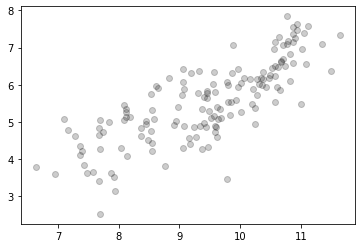

In [6]:
plt.scatter(data['Logged GDP per capita'], data['Ladder score'], c='k', alpha=0.2)

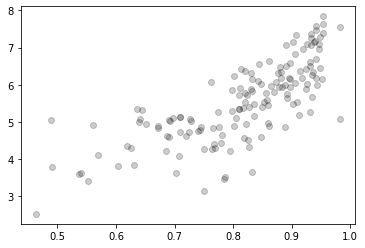

In [7]:
plt.scatter(data['Social support'], data['Ladder score'], c='k', alpha=0.2)

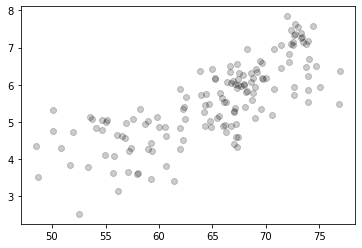

In [8]:
plt.scatter(data['Healthy life expectancy'], data['Ladder score'], c='k', alpha=0.2)

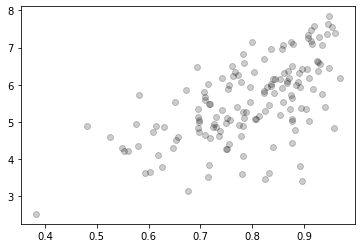

In [9]:
plt.scatter(data['Freedom to make life choices'], data['Ladder score'], c='k', alpha=0.2)

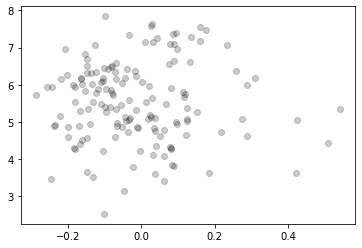

In [10]:
plt.scatter(data['Generosity'], data['Ladder score'], c='k', alpha=0.2)

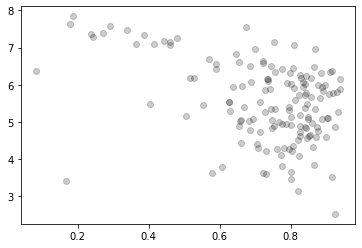

In [11]:
plt.scatter(data['Perceptions of corruption'], data['Ladder score'], c='k', alpha=0.2)

In [12]:
se_asia = data[data['Regional indicator']=='Southeast Asia']
e_asia = data[data['Regional indicator']=='East Asia']

se_asia.shape, e_asia.shape

((9, 20), (6, 20))

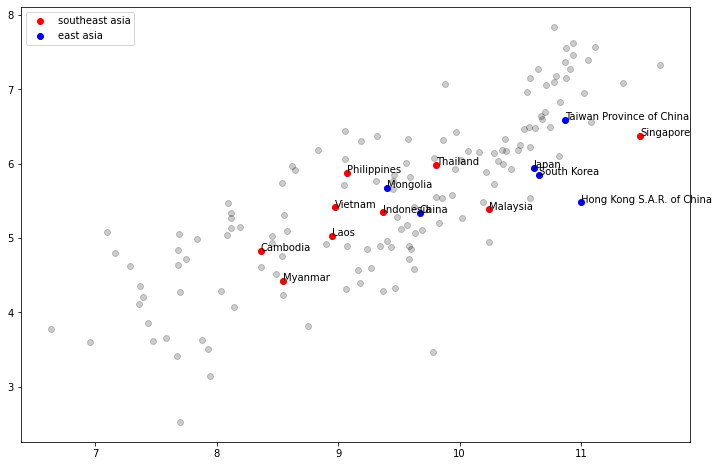

In [19]:
plt.figure(figsize=[12,8])
plt.scatter(data['Logged GDP per capita'], data['Ladder score'], c='k', alpha=0.2)
plt.scatter(se_asia['Logged GDP per capita'], se_asia['Ladder score'], c='red', label='southeast asia')
plt.scatter(e_asia['Logged GDP per capita'], e_asia['Ladder score'], c='blue', label='east asia')
plt.legend(loc='upper left')

for i in range(9):
    c = se_asia.iloc[i]
    plt.text(c['Logged GDP per capita'], c['Ladder score'], c['Country name'])

for i in range(6):
    c = e_asia.iloc[i]
    plt.text(c['Logged GDP per capita'], c['Ladder score'], c['Country name'])

In [25]:
data[(data['Logged GDP per capita']<7.5) & (data['Ladder score']>5)]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
95,Niger,Sub-Saharan Africa,5.074,0.102,5.273,4.875,7.098,0.641,53.78,0.806,0.018,0.693,2.43,0.162,0.402,0.167,0.516,0.2,0.157,3.47


In [23]:
data[(data['Logged GDP per capita']<10) & (data['Ladder score']>7)]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
15,Costa Rica,Latin America and Caribbean,7.069,0.056,7.179,6.96,9.88,0.891,71.4,0.934,-0.126,0.809,2.43,1.134,0.966,0.722,0.673,0.105,0.083,3.387


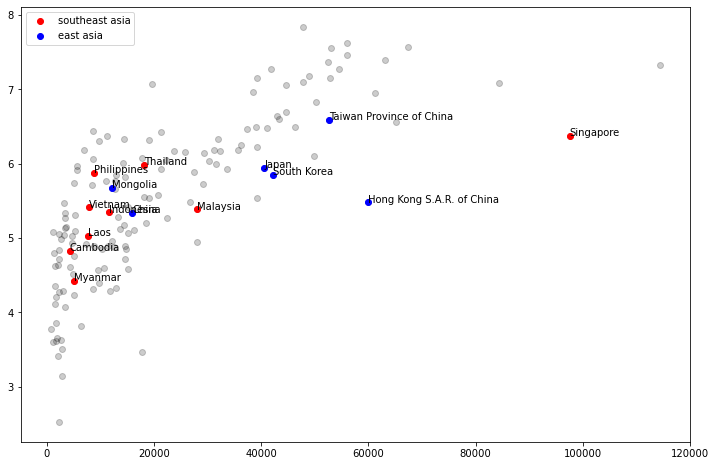

In [20]:
plt.figure(figsize=[12,8])
plt.scatter(np.exp(data['Logged GDP per capita']), data['Ladder score'], c='k', alpha=0.2)
plt.scatter(np.exp(se_asia['Logged GDP per capita']), se_asia['Ladder score'], c='red', label='southeast asia')
plt.scatter(np.exp(e_asia['Logged GDP per capita']), e_asia['Ladder score'], c='blue', label='east asia')
plt.legend(loc='upper left')

for i in range(9):
    c = se_asia.iloc[i]
    plt.text(np.exp(c['Logged GDP per capita']), c['Ladder score'], c['Country name'])

for i in range(6):
    c = e_asia.iloc[i]
    plt.text(np.exp(c['Logged GDP per capita']), c['Ladder score'], c['Country name'])

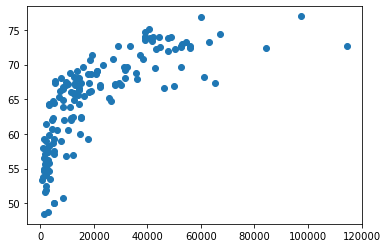

In [22]:
plt.scatter(np.exp(data['Logged GDP per capita']), data['Healthy life expectancy'])

In [29]:
# gdp 가 높은 나라 순으로 정렬하시오. => sort_values()
# 지역별 나라 갯수를 구하시오. => value_counts()
data.sort_values('Logged GDP per capita', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.200,0.837,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [30]:
data['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [31]:
data.sort_values('Social support', ascending=False).head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
44,Kazakhstan,Commonwealth of Independent States,6.152,0.047,6.243,6.060,10.155,0.952,65.200,0.853,-0.069,0.733,2.43,1.230,1.103,0.527,0.573,0.143,0.132,2.446
28,Slovenia,Central and Eastern Europe,6.461,0.043,6.546,6.376,10.529,0.948,71.400,0.949,-0.101,0.806,2.43,1.360,1.093,0.722,0.690,0.122,0.085,2.388
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124


In [32]:
data[(data['Logged GDP per capita']<10) & (data['Ladder score']>6)]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
15,Costa Rica,Latin America and Caribbean,7.069,0.056,7.179,6.960,9.880,0.891,71.400,0.934,-0.126,0.809,2.43,1.134,0.966,0.722,0.673,0.105,0.083,3.387
29,Guatemala,Latin America and Caribbean,6.435,0.073,6.577,6.292,9.053,0.813,64.958,0.906,-0.038,0.775,2.43,0.845,0.790,0.519,0.638,0.163,0.105,3.375
30,Uruguay,Latin America and Caribbean,6.431,0.046,6.521,6.341,9.966,0.925,69.100,0.896,-0.092,0.590,2.43,1.164,1.042,0.649,0.625,0.128,0.223,2.600
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182
34,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,-0.071,0.756,2.43,1.028,0.944,0.571,0.514,0.142,0.117,3.015
35,Mexico,Latin America and Caribbean,6.317,0.053,6.420,6.213,9.859,0.831,68.597,0.862,-0.147,0.799,2.43,1.126,0.830,0.634,0.585,0.092,0.089,2.961
36,Jamaica,Latin America and Caribbean,6.309,0.156,6.615,6.004,9.186,0.877,67.500,0.890,-0.137,0.884,2.43,0.891,0.932,0.599,0.618,0.099,0.035,3.135
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
47,Serbia,Central and Eastern Europe,6.078,0.053,6.181,5.974,9.787,0.873,68.600,0.778,0.002,0.835,2.43,1.101,0.924,0.634,0.482,0.189,0.066,2.682
48,El Salvador,Latin America and Caribbean,6.061,0.065,6.188,5.933,9.054,0.762,66.402,0.888,-0.110,0.688,2.43,0.845,0.675,0.565,0.615,0.116,0.160,3.085


## 지하철 데이터
- 서울 열린데이터 광장 (http://data.seoul.go.kr)
- http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
- 교통카드(선후불교통카드 및 1회용 교통카드)를 이용한 지하철호선별 역별(서울교통공사, 한국철도공사, 공항철도, 9호선) 승하차인원을 나타내는 정보입니다. (일단위)<br>

In [33]:
subway = pd.read_csv('CARD_SUBWAY_MONTH_202106.csv')
subway.shape

(18035, 7)

In [34]:
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,기타
0,20210601,3호선,신사,28955,30583,20210604,NaN
1,20210601,3호선,잠원,4780,4656,20210604,NaN
2,20210601,3호선,고속터미널,33986,32532,20210604,NaN
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,NaN
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,NaN
...,...,...,...,...,...,...,...
18030,20210630,1호선,서울역,42545,39641,20210703,NaN
18031,20210630,8호선,신흥,4343,4713,20210703,NaN
18032,20210630,분당선,망포,14451,13503,20210703,NaN
18033,20210630,분당선,매탄권선,5121,4907,20210703,NaN


In [35]:
subway = subway.iloc[:,:-2]
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210601,3호선,신사,28955,30583
1,20210601,3호선,잠원,4780,4656
2,20210601,3호선,고속터미널,33986,32532
3,20210601,3호선,교대(법원.검찰청),14136,9362
4,20210601,3호선,남부터미널(예술의전당),27604,28821
...,...,...,...,...,...
18030,20210630,1호선,서울역,42545,39641
18031,20210630,8호선,신흥,4343,4713
18032,20210630,분당선,망포,14451,13503
18033,20210630,분당선,매탄권선,5121,4907


In [41]:
# 노선수와 역수를 알아보시오
np.sort(subway.노선명.unique()) # 25개

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [44]:
np.sort(subway.역명.unique()) # 520개

array(['4.19민주묘지', '가능', '가락시장', '가산디지털단지', '가양', '가오리', '가좌', '가천대',
       '가평', '간석', '갈매', '강남', '강남구청', '강동', '강동구청', '강매', '강변(동서울터미널)',
       '강일', '강촌', '개롱', '개봉', '개포동', '개화', '개화산', '거여', '건대입구', '검암',
       '경기광주', '경마공원', '경복궁(정부서울청사)', '경찰병원', '계양', '고덕', '고려대(종암)', '고색',
       '고속터미널', '고잔', '곡산', '곤지암', '공덕', '공릉(서울과학기술대)', '공항시장', '공항화물청사',
       '과천', '관악', '광나루(장신대)', '광명', '광명사거리', '광운대', '광화문(세종문화회관)',
       '광흥창(서강)', '교대(법원.검찰청)', '구로', '구로디지털단지', '구룡', '구리', '구반포', '구산',
       '구성', '구의(광진구청)', '구일', '구파발', '국수', '국회의사당', '군자(능동)', '군포',
       '굴봉산', '굴포천', '굽은다리(강동구민회관앞)', '금곡', '금릉', '금정', '금천구청', '금촌',
       '금호', '기흥', '길동', '길음', '김유정', '김포공항', '까치산', '까치울', '낙성대(강감찬)',
       '남구로', '남동인더스파크', '남부터미널(예술의전당)', '남성', '남영', '남춘천', '남태령',
       '남한산성입구(성남법원.검찰청)', '내방', '노들', '노량진', '노원', '녹번', '녹사평(용산구청)',
       '녹양', '녹천', '논현', '능곡', '단대오거리', '달월', '답십리', '당고개', '당산', '당정',
       '대곡', '대공원', '대림(구로구청)', '대모산입구', '대방', '대성리', '대야미', '대청', '대치',
 

In [45]:
subway.노선명.value_counts()

5호선         1680
7호선         1530
2호선         1500
경부선         1170
6호선         1129
분당선         1031
3호선         1006
경원선          876
경의선          788
4호선          780
9호선          750
중앙선          630
경인선          600
경춘선          570
수인선          540
8호선          510
공항철도 1호선     420
우이신설선        390
안산선          390
9호선2~3단계     390
경강선          330
일산선          305
1호선          300
과천선          240
장항선          180
Name: 노선명, dtype: int64

In [46]:
# 노선별 역의 갯수를 구하시오
subway.노선명.value_counts()/30

5호선         56.000000
7호선         51.000000
2호선         50.000000
경부선         39.000000
6호선         37.633333
분당선         34.366667
3호선         33.533333
경원선         29.200000
경의선         26.266667
4호선         26.000000
9호선         25.000000
중앙선         21.000000
경인선         20.000000
경춘선         19.000000
수인선         18.000000
8호선         17.000000
공항철도 1호선    14.000000
우이신설선       13.000000
안산선         13.000000
9호선2~3단계    13.000000
경강선         11.000000
일산선         10.166667
1호선         10.000000
과천선          8.000000
장항선          6.000000
Name: 노선명, dtype: float64

In [47]:
subway.groupby('노선명').apply(lambda df: len(df.역명.unique()))

노선명
1호선         10
2호선         50
3호선         34
4호선         26
5호선         56
6호선         39
7호선         51
8호선         17
9호선         25
9호선2~3단계    13
경강선         11
경부선         39
경원선         30
경의선         29
경인선         20
경춘선         19
공항철도 1호선    14
과천선          8
분당선         35
수인선         18
안산선         13
우이신설선       13
일산선         11
장항선          6
중앙선         21
dtype: int64

In [52]:
# 1호선에는 어떤 역이 있는가?
subway[subway.노선명=='1호선'].역명.unique()

array(['청량리(서울시립대입구)', '제기동', '신설동', '동대문', '종로5가', '종로3가', '종각', '시청',
       '동묘앞', '서울역'], dtype=object)

In [53]:
subway[subway.노선명=='4호선'].역명.unique()

array(['수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)',
       '한성대입구(삼선교)', '혜화', '동대문', '동대문역사문화공원(DDP)', '충무로', '명동',
       '회현(남대문시장)', '서울역', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)',
       '동작(현충원)', '총신대입구(이수)', '사당', '남태령', '당고개', '상계', '노원', '창동', '쌍문'],
      dtype=object)

In [56]:
date = pd.to_datetime(subway.사용일자, format='%Y%m%d')
date

0       2021-06-01
1       2021-06-01
2       2021-06-01
3       2021-06-01
4       2021-06-01
           ...    
18030   2021-06-30
18031   2021-06-30
18032   2021-06-30
18033   2021-06-30
18034   2021-06-30
Name: 사용일자, Length: 18035, dtype: datetime64[ns]

In [57]:
subway['년'] = date.dt.year
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,년
0,20210601,3호선,신사,28955,30583,2021
1,20210601,3호선,잠원,4780,4656,2021
2,20210601,3호선,고속터미널,33986,32532,2021
3,20210601,3호선,교대(법원.검찰청),14136,9362,2021
4,20210601,3호선,남부터미널(예술의전당),27604,28821,2021
...,...,...,...,...,...,...
18030,20210630,1호선,서울역,42545,39641,2021
18031,20210630,8호선,신흥,4343,4713,2021
18032,20210630,분당선,망포,14451,13503,2021
18033,20210630,분당선,매탄권선,5121,4907,2021


In [58]:
subway['월'] = date.dt.month
subway['일'] = date.dt.day
subway['요일'] = date.dt.dayofweek
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,년,월,일,요일
0,20210601,3호선,신사,28955,30583,2021,6,1,1
1,20210601,3호선,잠원,4780,4656,2021,6,1,1
2,20210601,3호선,고속터미널,33986,32532,2021,6,1,1
3,20210601,3호선,교대(법원.검찰청),14136,9362,2021,6,1,1
4,20210601,3호선,남부터미널(예술의전당),27604,28821,2021,6,1,1
...,...,...,...,...,...,...,...,...,...
18030,20210630,1호선,서울역,42545,39641,2021,6,30,2
18031,20210630,8호선,신흥,4343,4713,2021,6,30,2
18032,20210630,분당선,망포,14451,13503,2021,6,30,2
18033,20210630,분당선,매탄권선,5121,4907,2021,6,30,2


In [59]:
# 날자별 총승객수는?
# 요일별 총승객수는?
subway.groupby('사용일자')['승차총승객수'].sum()

사용일자
20210601    6585184
20210602    6666237
20210603    6425204
20210604    6967783
20210605    4764571
20210606    3336643
20210607    6463999
20210608    6621696
20210609    6653343
20210610    6655994
20210611    6678928
20210612    4598198
20210613    3259268
20210614    6516407
20210615    6528382
20210616    6755019
20210617    6712810
20210618    6775221
20210619    4832421
20210620    3415926
20210621    6707485
20210622    6787145
20210623    6788156
20210624    6864714
20210625    7103159
20210626    4656405
20210627    3461015
20210628    6584734
20210629    6762163
20210630    6737746
Name: 승차총승객수, dtype: int64

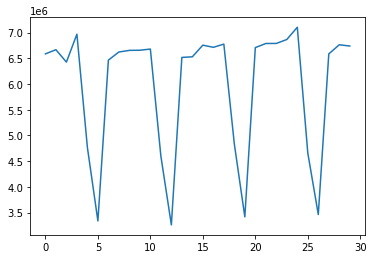

In [62]:
plt.plot(subway.groupby('사용일자')['승차총승객수'].sum().to_list())

In [69]:
# 날자별 총승객수는?
# 요일별 총승객수는?
subway.groupby('요일')['승차총승객수'].mean()

요일
0    10924.168399
1    11069.028932
2    11177.811377
3    11080.100582
4    11444.944283
5     7835.243142
6     5613.688333
Name: 승차총승객수, dtype: float64

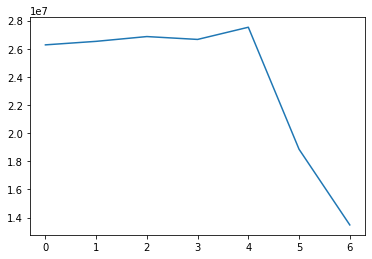

In [67]:
subway2 = subway[subway.일<29]

plt.plot(subway2.groupby('요일')['승차총승객수'].sum().to_list())

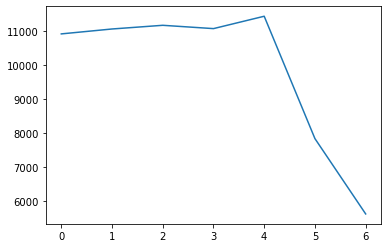

In [68]:
plt.plot(subway.groupby('요일')['승차총승객수'].mean().to_list())

In [72]:
# 요일별, 노선별 승차총승객수 평균
pv = pd.pivot_table(subway, values='승차총승객수', index='요일', columns='노선명', aggfunc='mean')
pv

노선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
요일,,,,,,,,,,,,,,,,,,,,,
0,21093.075,25854.000,14467.283582,17528.750000,10978.915179,8226.353333,13231.666667,10465.779412,10549.350,6929.384615,...,2003.250000,6464.071429,11699.25000,10106.394161,3111.791667,8965.596154,3262.903846,10434.325000,1939.458333,4172.595238
1,21272.620,26397.440,14692.827381,17811.161538,11139.582143,8336.587302,13394.788235,10670.188235,10698.928,7061.323077,...,1978.410526,6427.200000,12070.50000,10253.691860,3135.977778,8989.292308,3253.492308,10046.576923,1920.033333,4196.476190
2,21526.960,26638.512,14696.278107,18054.269231,11269.096429,8541.486631,13489.168627,10751.494118,10786.016,7135.569231,...,1997.421053,6490.157143,12176.82500,10328.424419,3174.022222,9030.261538,3309.276923,10551.540000,1879.666667,4232.676190
3,21436.300,26514.045,14635.422222,17857.615385,11135.897321,8480.013423,13322.019608,10700.294118,10749.100,7182.557692,...,1978.828947,6484.214286,11984.75000,10186.000000,3087.777778,8917.519231,3272.076923,10121.000000,1921.333333,4186.107143
4,22179.075,27292.510,15547.022556,18320.875000,11318.040179,8628.821192,13607.897059,10881.720588,11111.550,7246.134615,...,2000.552632,6907.392857,12222.56250,10692.246377,3220.694444,9251.615385,3341.192308,10696.250000,2189.083333,4304.976190
5,15773.975,17945.830,10544.932836,12878.076923,7230.102679,6034.842105,8773.357843,7064.382353,7074.490,4487.673077,...,1627.644737,4868.892857,8179.53125,7222.248175,2384.361111,6997.673077,2497.596154,7172.428571,1775.333333,3430.488095
6,11365.225,12394.635,7284.030075,8995.557692,5059.678571,4351.456954,6096.607843,4882.397059,5001.530,3078.557692,...,1414.539474,4063.892857,5737.00000,4873.367647,1778.361111,5266.596154,1975.442308,5405.200000,1470.750000,2693.190476


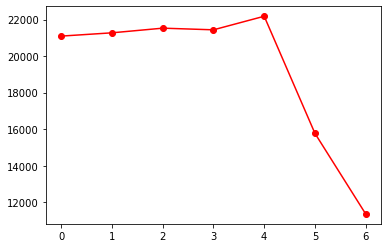

In [75]:
plt.plot(pv['1호선'], 'ro-')

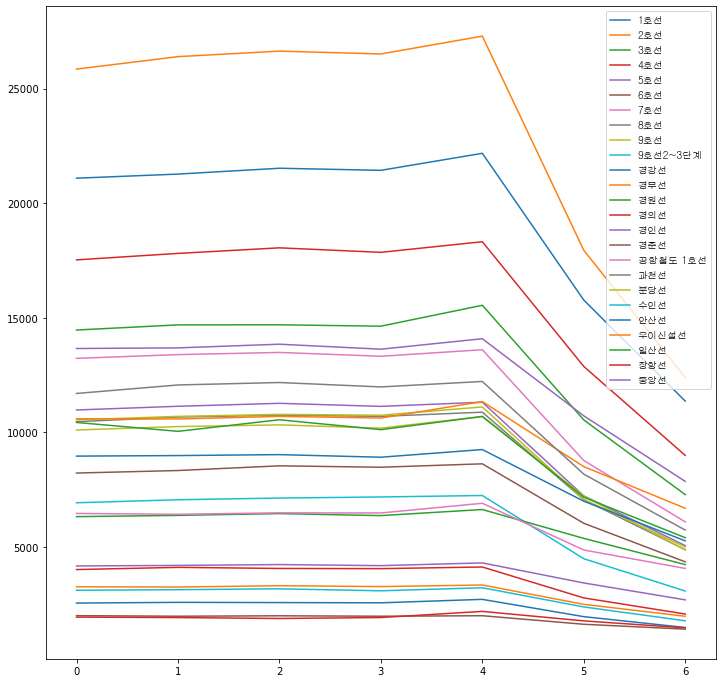

In [83]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

plt.figure(figsize=[12,12])
plt.plot(pv.values)
plt.legend(pv.columns, prop=prop)
pass

## 날씨 데이터
- 기상청

In [86]:
weather = pd.read_csv('OBS_ASOS_DD_20210720133449.csv', encoding='cp949')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   200 non-null    int64  
 1   지점명                  200 non-null    object 
 2   일시                   200 non-null    object 
 3   평균기온(°C)             200 non-null    float64
 4   최저기온(°C)             200 non-null    float64
 5   최저기온 시각(hhmi)        200 non-null    int64  
 6   최고기온(°C)             200 non-null    float64
 7   최고기온 시각(hhmi)        200 non-null    int64  
 8   강수 계속시간(hr)          0 non-null      float64
 9   10분 최다 강수량(mm)       61 non-null     float64
 10  10분 최다강수량 시각(hhmi)   43 non-null     float64
 11  1시간 최다강수량(mm)        61 non-null     float64
 12  1시간 최다 강수량 시각(hhmi)  46 non-null     float64
 13  일강수량(mm)             96 non-null     float64
 14  최대 순간 풍속(m/s)        200 non-null    float64
 15  최대 순간 풍속 풍향(16방위)    200 non-null    int

In [87]:
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,114,원주,2021-01-01,-6.1,-12.0,656,-0.3,1424,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,1.2,NaN,NaN,NaN
1,114,원주,2021-01-02,-4.9,-9.0,746,-0.7,1425,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.3,1.9,NaN,NaN,NaN
2,114,원주,2021-01-03,-5.6,-10.5,733,-1.0,1515,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,1.2,NaN,NaN,NaN
3,114,원주,2021-01-04,-3.9,-11.2,744,1.5,1450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.4,NaN,NaN,NaN
4,114,원주,2021-01-05,-3.8,-8.9,2347,-0.7,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.2,1.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,114,원주,2021-07-15,26.7,23.5,2357,32.4,1100,NaN,1.2,...,NaN,NaN,NaN,NaN,NaN,2.9,4.1,NaN,NaN,NaN
196,114,원주,2021-07-16,26.3,21.9,547,32.9,1332,NaN,1.6,...,NaN,NaN,NaN,NaN,NaN,3.8,5.5,NaN,NaN,NaN
197,114,원주,2021-07-17,26.7,21.8,453,31.8,1417,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.3,6.2,NaN,NaN,NaN
198,114,원주,2021-07-18,27.3,22.5,526,32.2,1429,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,5.0,7.2,NaN,NaN,NaN


In [94]:
weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

In [89]:
date = pd.to_datetime(weather.일시)
date.shape

(200,)

In [90]:
date2 = pd.date_range('2021/1/1', '2021/7/19')

In [91]:
date2.shape

(200,)

In [93]:
set(date) - set(date2)

set()

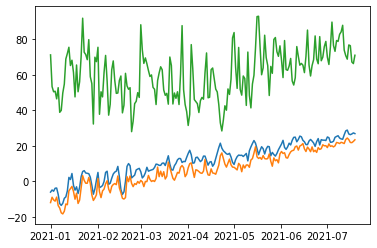

In [98]:
date = pd.to_datetime(weather.일시)
plt.plot(date, weather['평균기온(°C)'])
plt.plot(date, weather['최저기온(°C)'])
plt.plot(date, weather['평균 상대습도(%)'])

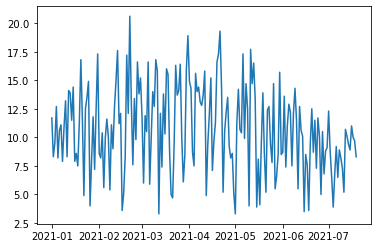

In [100]:
date = pd.to_datetime(weather.일시)
plt.plot(date, weather['최고기온(°C)'] - weather['최저기온(°C)'])